In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd/content/drive/Shareddrives/MobileNetV2

/content/drive/Shareddrives/MobileNetV2


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [ ]:
# Set the batch size and image size
batch_size = 32
img_size = (224, 224)
num_classes = 2

In [ ]:
# Define your custom dataset directory
train_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/train'
validation_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/validation'
test_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/test'

In [ ]:
# Create the data generators for train/validation/test sets
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 840 images belonging to 2 classes.
Found 180 images belonging to 2 classes.
Found 180 images belonging to 2 classes.


In [ ]:
# Load the pre-trained MobileNetv2 model without the top layer
mobilenetv3large = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

12683000/12683000 [==============================] - 0s 0us/step


In [ ]:
# Freeze the pre-trained layers
for layer in mobilenetv3large.layers:
    layer.trainable = False

In [ ]:
# Add a new top layer for the classification task
x = mobilenetv3large.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

In [ ]:
# Create the custom model
model = Model(inputs=mobilenetv3large.input, outputs=predictions)

In [ ]:
# Compile the model with a suitable optimizer and loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling[0][0]']              
                                )                                                                 
                                                                                              

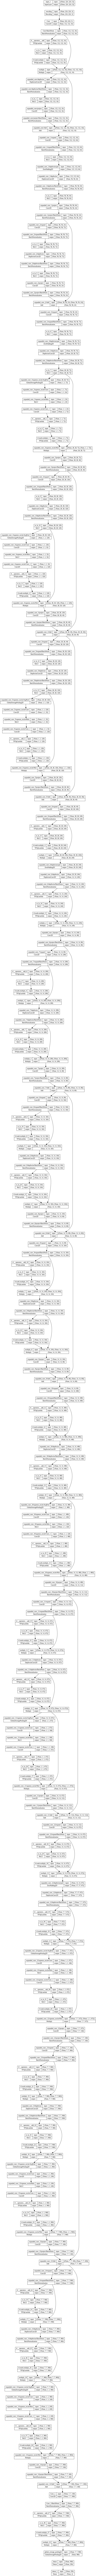

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 17.3 MB/s eta 0:00:00


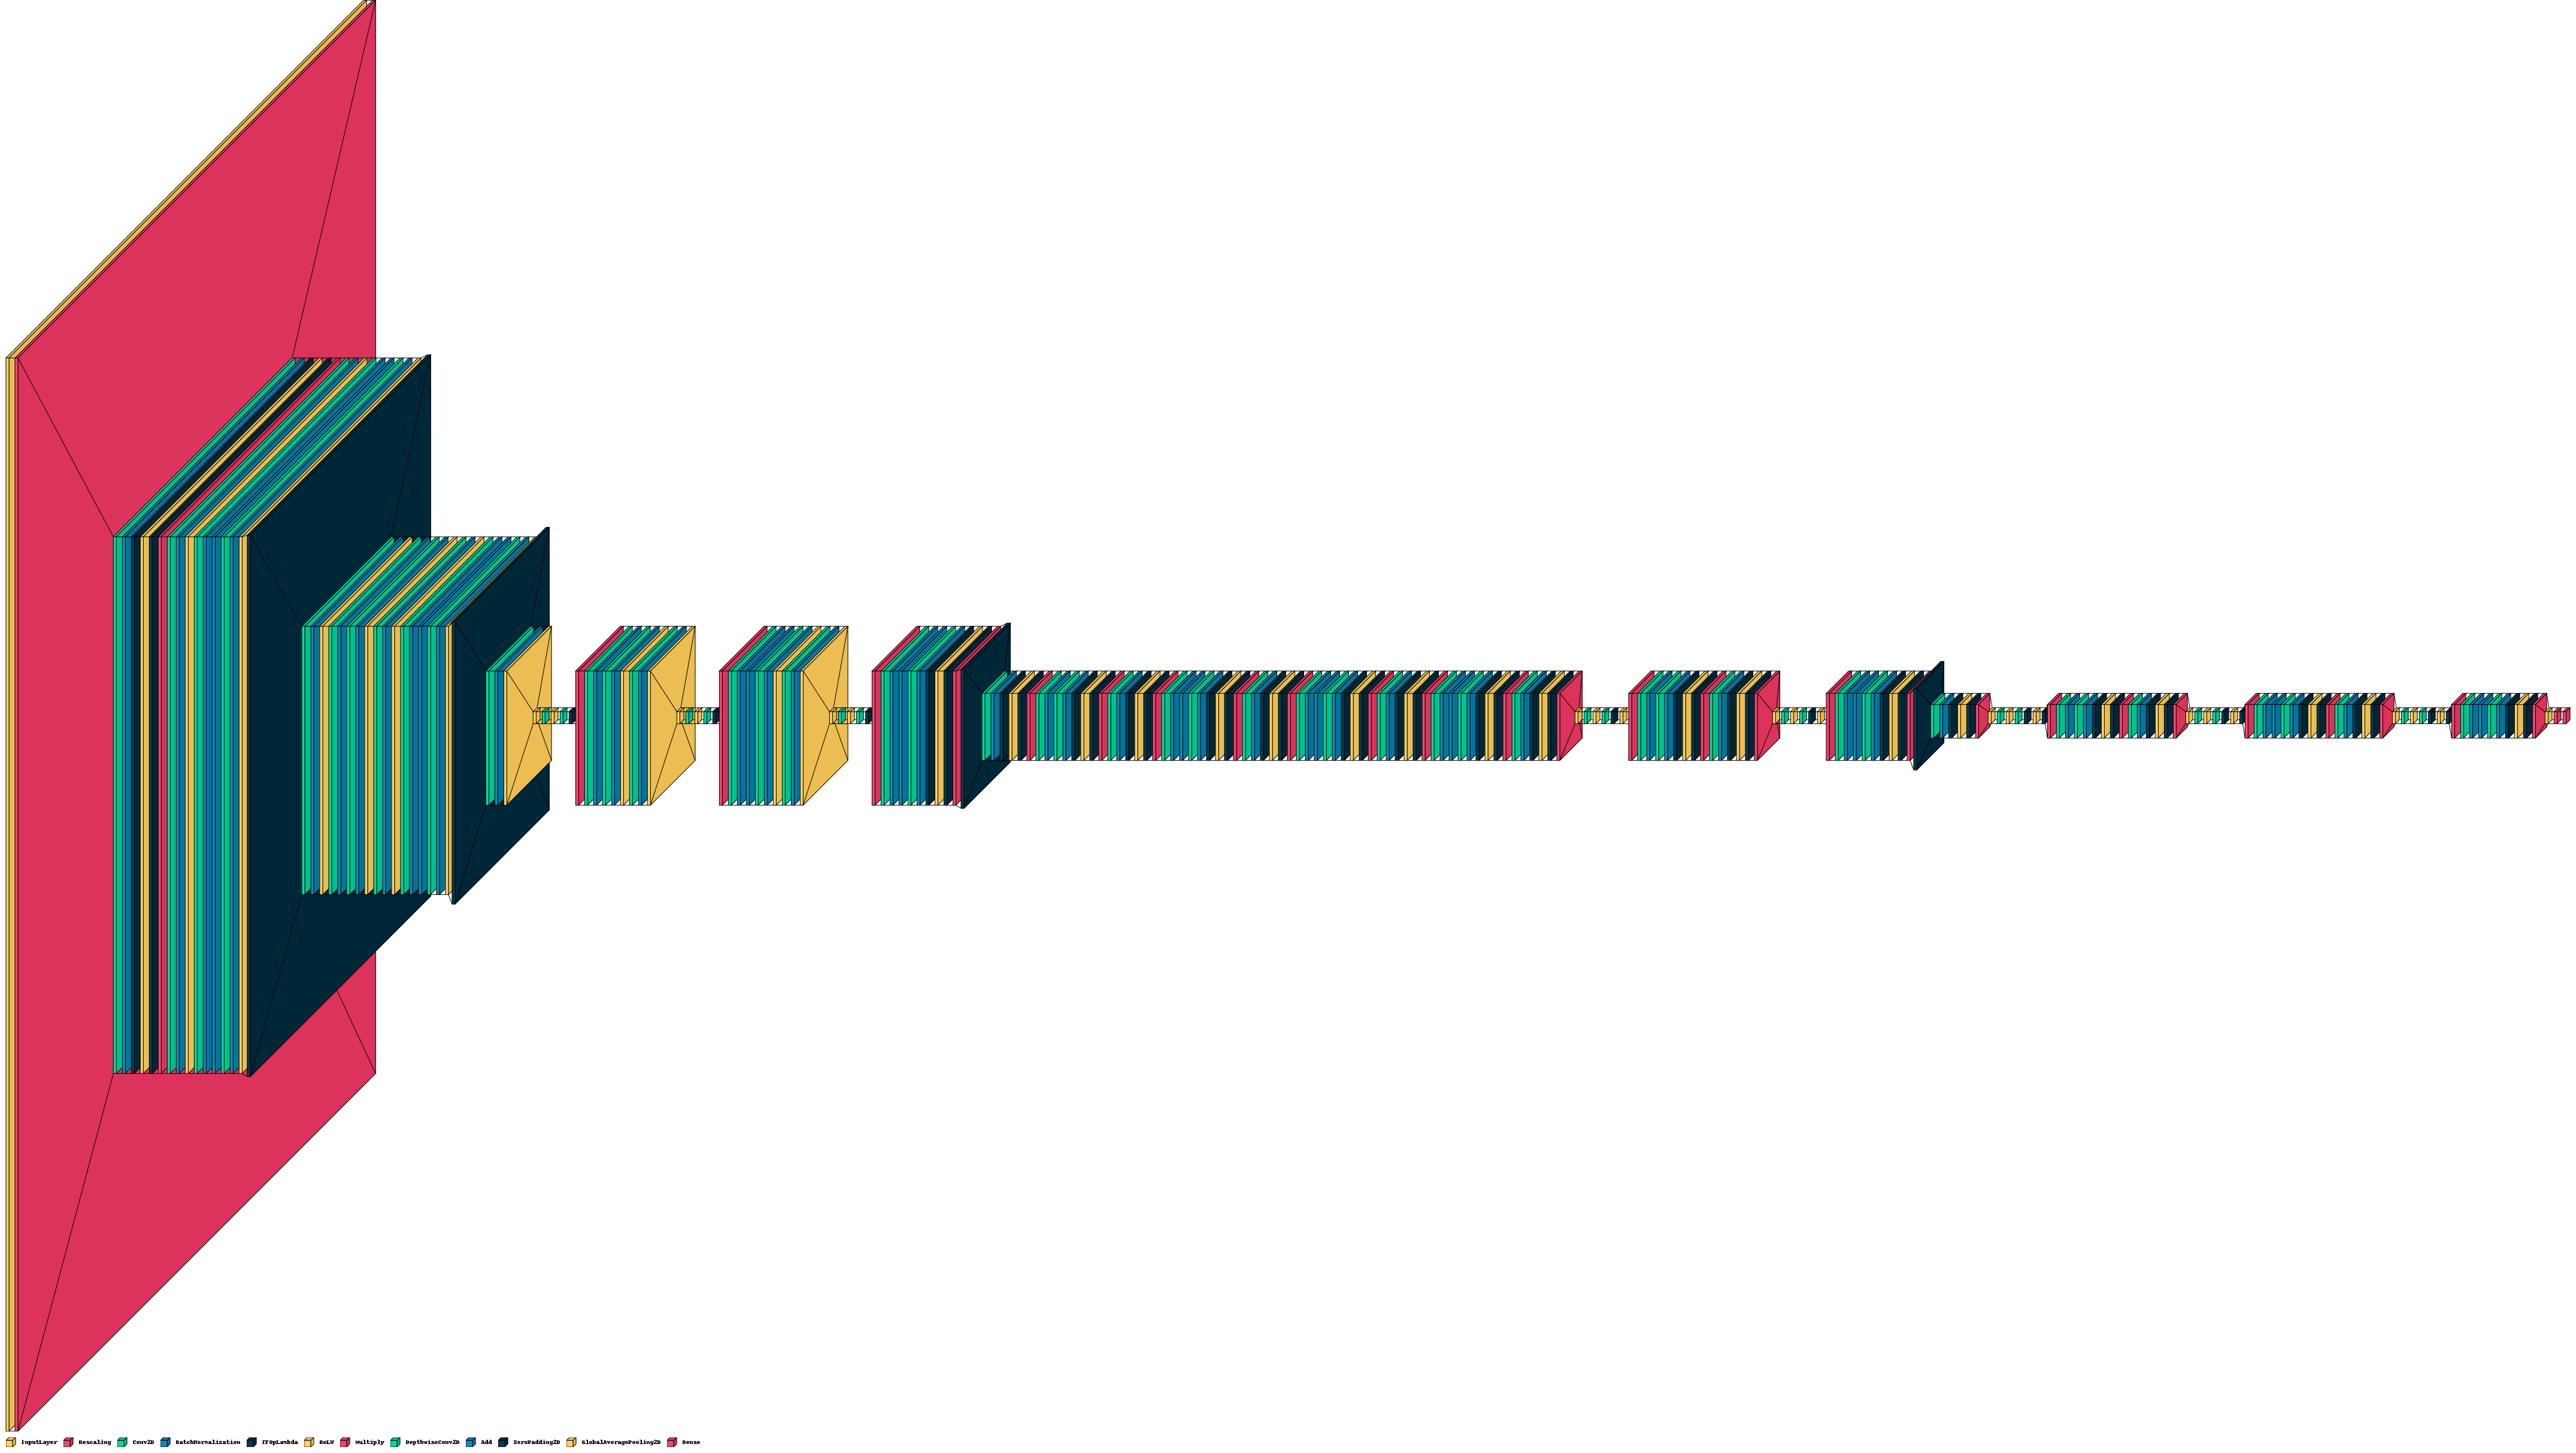

In [ ]:
model1=model
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model1, scale_xy=8, scale_z=5, max_z=5, legend=True)
#visualkeras.layered_view(model1, legend=True)

In [ ]:
# Train the model with the train and validation generators
num_epochs = 10
history = model.fit(train_generator, epochs=num_epochs, validation_data=validation_generator)

Epoch 1/10
27/27 [==============================] - 443s 16s/step - loss: 0.7086 - accuracy: 0.5071 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 2/10
27/27 [==============================] - 65s 2s/step - loss: 0.7085 - accuracy: 0.5083 - val_loss: 0.6875 - val_accuracy: 0.5056
Epoch 3/10
27/27 [==============================] - 62s 2s/step - loss: 0.6879 - accuracy: 0.5405 - val_loss: 0.6680 - val_accuracy: 0.6222
Epoch 4/10
27/27 [==============================] - 63s 2s/step - loss: 0.6941 - accuracy: 0.5214 - val_loss: 0.6665 - val_accuracy: 0.6167
Epoch 5/10
27/27 [==============================] - 63s 2s/step - loss: 0.6838 - accuracy: 0.5595 - val_loss: 0.6597 - val_accuracy: 0.6500
Epoch 6/10
27/27 [==============================] - 62s 2s/step - loss: 0.6777 - accuracy: 0.5619 - val_loss: 0.6663 - val_accuracy: 0.5889
Epoch 7/10
27/27 [==============================] - 63s 2s/step - loss: 0.6874 - accuracy: 0.5357 - val_loss: 0.7025 - val_accuracy: 0.5056
Epoch 8/10
27/27 [

In [ ]:
# Evaluate the model on the test set
model.evaluate(test_generator)

6/6 [==============================] - 100s 20s/step - loss: 0.6586 - accuracy: 0.5667


[0.6586024165153503, 0.5666666626930237]

In [ ]:
# Evaluate the model on the validation set
validation_loss, validation_acc = model.evaluate(validation_generator)
print('Validation Loss:', validation_loss)
print('Validation Accuracy:', validation_acc)

6/6 [==============================] - 6s 1s/step - loss: 0.6527 - accuracy: 0.6389
Validation Loss: 0.6527042388916016
Validation Accuracy: 0.6388888955116272


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

6/6 [==============================] - 6s 940ms/step - loss: 0.6586 - accuracy: 0.5667
Test Loss: 0.6586024165153503
Test Accuracy: 0.5666666626930237


In [ ]:
# Save the model
#model.save('vgg19_custom.h5')